# Heatmap of Event Density
* Create a 2D heatmap showing the density of events at different x, y locations on the sensor.
* Useful for identifying hotspots of activity on the sensor.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from common import helpers

# Load the data
iterator = helpers.load_evts_from_file(input("Enter file path: "))
df = helpers.evts_to_df(iterator)

# Convert to datetime and set index
df['t'] = pd.to_datetime(df['t'], unit='us', origin='unix')
df.set_index('t', inplace=True)

# Filter data by polarity
positive = df[df['p'] == 1]
negative = df[df['p'] == 0]


OSError: Failed to open camera  !

In [ ]:
# change these variables to change the resampling rate
resample_rate = '1ms'
resample_scale_factor_s = 1e3 # 1e3 for ms, 1e6 for us

In [2]:
# Change these variables to change the time window
t_0 = 15e3
t_1 = 30e3
zoom_t_0 = 26500
zoom_t_1 = 27000

# Change these variables to change the number of xticks on the plot
# xticks = count(y(t_0, t_1)) / timestep
x_timestep = None # None for default
zoom_timestep = 15 # None for default


ValueError: zero-size array to reduction operation fmin which has no identity

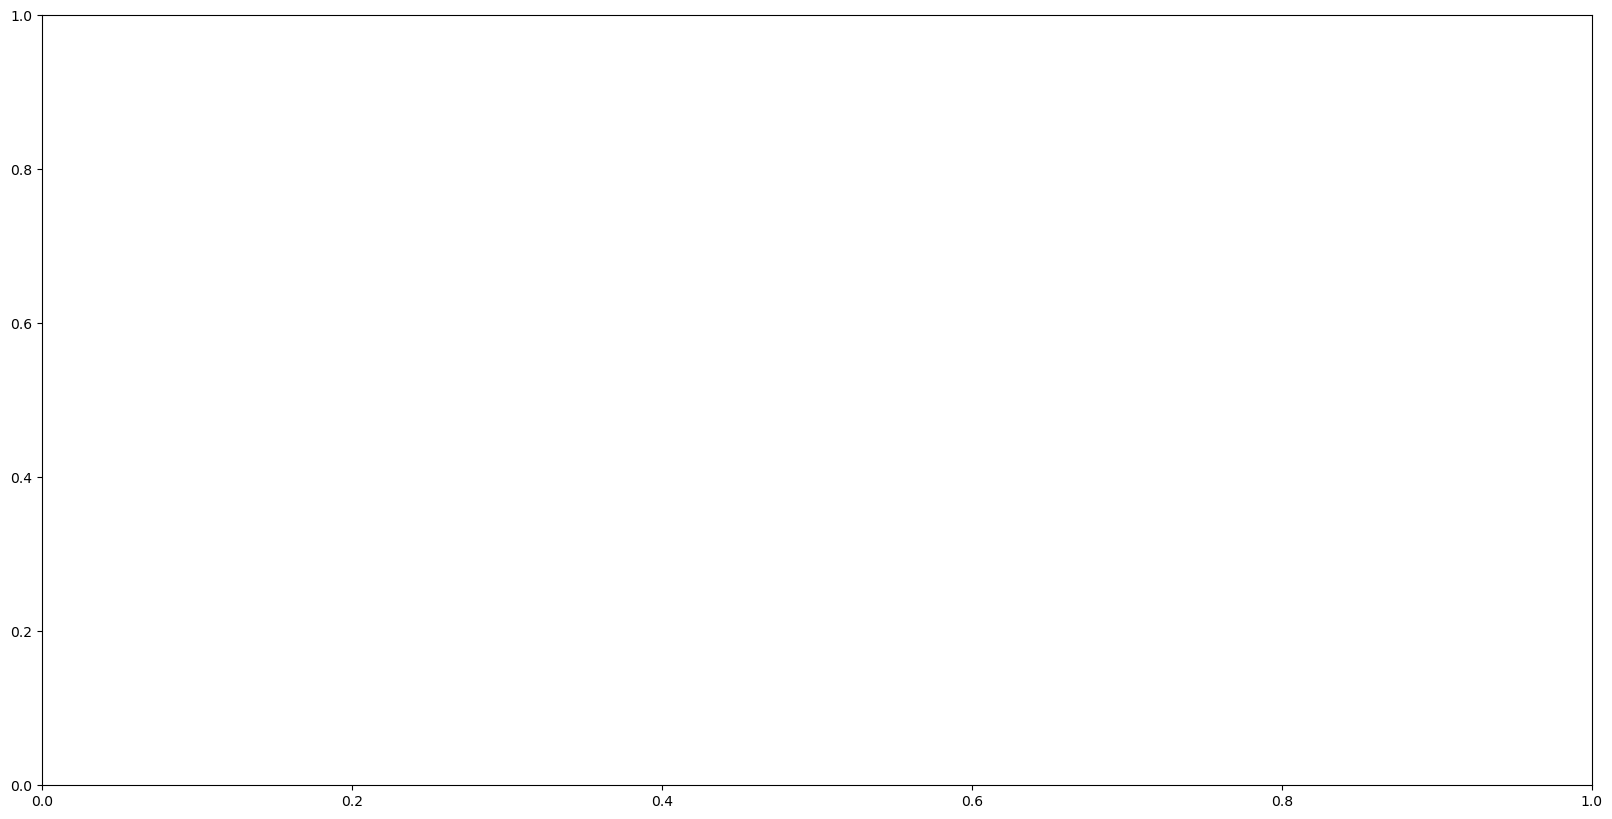

In [3]:
# Plot the data
fig, ax = plt.subplots(figsize=(20,10))
# filter out the events that are not in the time range
positive = df_pos[(df_pos['elapsed'] >= time_range[0]) & (df_pos['elapsed'] <= time_range[1])]
negative = df_neg[(df_neg['elapsed'] >= time_range[0]) & (df_neg['elapsed'] <= time_range[1])]

# plot a heatmap of the positive events
heatmap = sns.heatmap(positive.groupby(['elapsed', 'x', 'y']).size().unstack().fillna(0), ax=ax, cmap='Blues')
plt.title("Heatmap of positive events")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
# plot a heatmap of the negative events
heatmap = sns.heatmap(negative.groupby(['elapsed', 'x', 'y']).size().unstack().fillna(0), ax=ax, cmap='Reds')
plt.title("Heatmap of negative events")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
